In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
train=pd.read_csv('data/SeatleWeather.csv')

In [3]:
train.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
DATE    25551 non-null object
PRCP    25548 non-null float64
TMAX    25551 non-null int64
TMIN    25551 non-null int64
RAIN    25548 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [5]:
train.describe()

,PRCP,TMAX,TMIN
count,25548.000000,25551.000000,25551.000000
mean,0.106222,59.544206,44.514226
std,0.239031,12.772984,8.892836
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


In [6]:
train.shape

(25551, 5)

In [7]:
#Handling missing data

In [8]:
train.RAIN.value_counts()

False    14648
True     10900
Name: RAIN, dtype: int64

In [9]:
train['RAIN']=train.RAIN.map({False:0,True:1})

In [10]:
train.RAIN=train['RAIN'].fillna(0.0)

In [11]:
train.RAIN.value_counts()

0.0    14651
1.0    10900
Name: RAIN, dtype: int64

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
DATE    25551 non-null object
PRCP    25548 non-null float64
TMAX    25551 non-null int64
TMIN    25551 non-null int64
RAIN    25551 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 998.2+ KB


In [13]:
std_prcp=train.PRCP.std()

In [14]:
std_prcp

0.2390314590314671

In [15]:
train.PRCP=train.PRCP.fillna(std_prcp)

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
DATE    25551 non-null object
PRCP    25551 non-null float64
TMAX    25551 non-null int64
TMIN    25551 non-null int64
RAIN    25551 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 998.2+ KB


In [17]:
train['RAIN']=train['RAIN'].astype(int)

In [18]:
train.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,1
1,1948-01-02,0.59,45,36,1
2,1948-01-03,0.42,45,35,1
3,1948-01-04,0.31,45,34,1
4,1948-01-05,0.17,45,32,1


In [19]:
labelencoder=LabelEncoder()

In [20]:
train['RAIN']=labelencoder.fit_transform(train['RAIN'])

In [21]:
train['month'] = pd.DatetimeIndex(train['DATE']).month

In [22]:
train['day']=pd.DatetimeIndex(train['DATE']).day

In [23]:
train.head()

,DATE,PRCP,TMAX,TMIN,RAIN,month,day
0,1948-01-01,0.47,51,42,1,1,1
1,1948-01-02,0.59,45,36,1,1,2
2,1948-01-03,0.42,45,35,1,1,3
3,1948-01-04,0.31,45,34,1,1,4
4,1948-01-05,0.17,45,32,1,1,5


In [24]:
train.corr()

,PRCP,TMAX,TMIN,RAIN,month,day
PRCP,1.000000,-0.226673,-0.064309,0.515072,0.014926,-0.001431
TMAX,-0.226673,1.000000,0.860684,-0.389287,0.154979,0.001598
TMIN,-0.064309,0.860684,1.000000,-0.139975,0.222508,0.003056
RAIN,0.515072,-0.389287,-0.139975,1.000000,-0.046057,-0.003005
month,0.014926,0.154979,0.222508,-0.046057,1.000000,0.009622
day,-0.001431,0.001598,0.003056,-0.003005,0.009622,1.000000


In [25]:
rain=train[train['RAIN']==1]
norain=train[train['RAIN']==0]

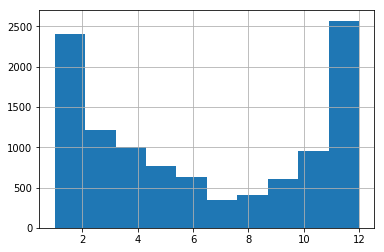

In [26]:
rain['month'].hist()

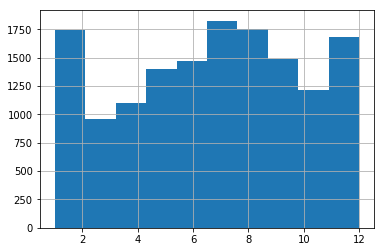

In [27]:
norain['month'].hist()

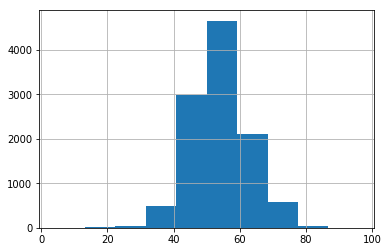

In [28]:
rain['TMAX'].hist()

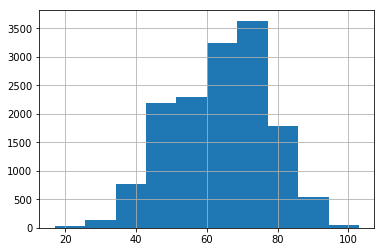

In [29]:
norain['TMAX'].hist()

In [30]:
train.head()

,DATE,PRCP,TMAX,TMIN,RAIN,month,day
0,1948-01-01,0.47,51,42,1,1,1
1,1948-01-02,0.59,45,36,1,1,2
2,1948-01-03,0.42,45,35,1,1,3
3,1948-01-04,0.31,45,34,1,1,4
4,1948-01-05,0.17,45,32,1,1,5


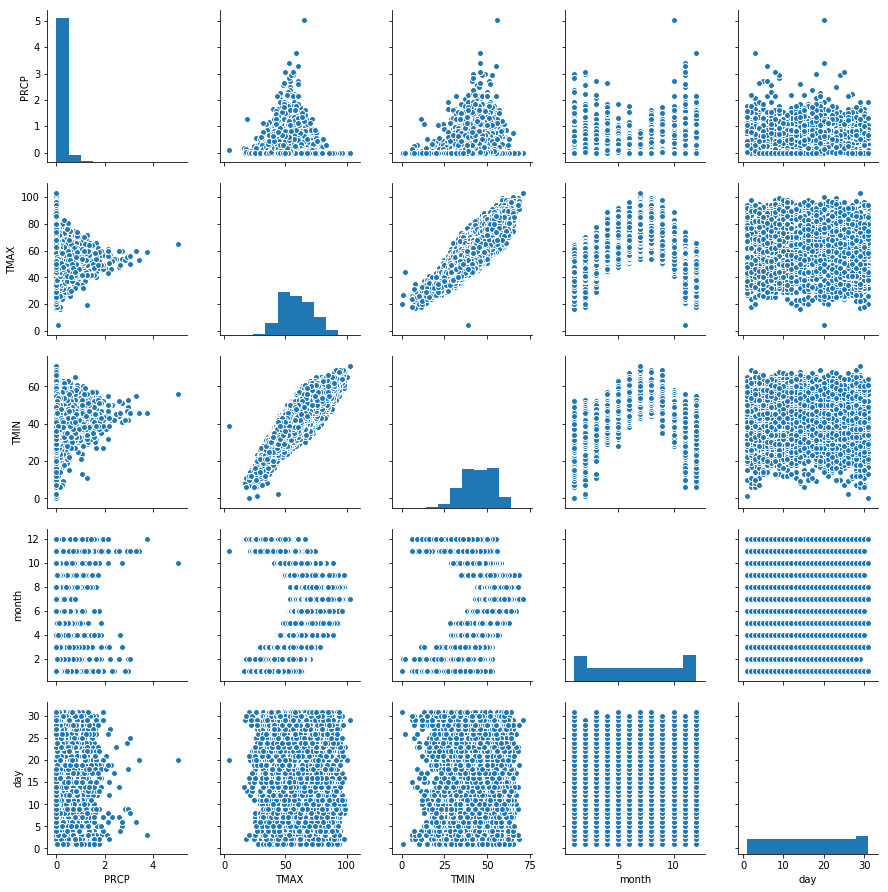

In [31]:
sns.pairplot(data=train[['PRCP','TMAX','TMIN','month','day']])

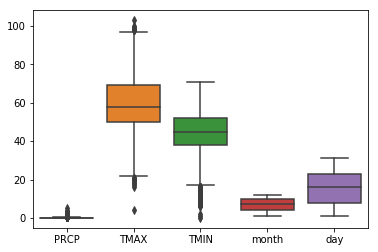

In [32]:
sns.boxplot(data=train[['PRCP','TMAX','TMIN','month','day']])

In [33]:

trainN = train.copy()
trainN=trainN.drop(trainN[trainN['TMIN']<17 ].index)
trainN=trainN.drop(trainN[(trainN['TMAX']>97.5) | (trainN['TMAX']< 21.5)].index)
trainN=trainN.drop(trainN[(trainN['PRCP']>0.25) | (trainN['PRCP']< -0.15) ].index)

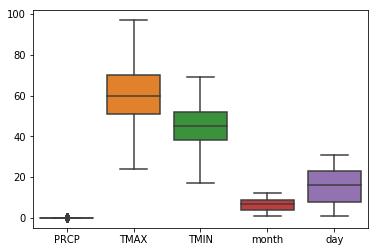

In [34]:
sns.boxplot(data=trainN[['PRCP','TMAX','TMIN','month','day']])

In [36]:
X=trainN[['PRCP','TMAX','TMIN','month','day']].copy()

y=trainN['RAIN'].copy()

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC,LinearSVC

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.pipeline import Pipeline
from sklearn import metrics

In [41]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)

scaler=StandardScaler()

Xscale=scaler.fit_transform(X)

XScaletrain,XScaletest,yscaletrain,yscaletest=train_test_split(Xscale,y,test_size=0.2)

(array([3095.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1284.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

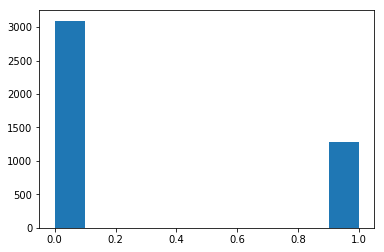

In [44]:
svc=SVC()
svc.fit(Xtrain,ytrain)

ypredS=svc.predict(Xtest)

plt.hist(ypredS)

In [47]:
metrics.accuracy_score(ytest,ypredS)

0.7481160082210551

In [48]:
metrics.confusion_matrix(ytest,ypredS)

array([[2459,  467],
       [ 636,  817]], dtype=int64)

In [49]:
svc=SVC()

svc.fit(XScaletrain,yscaletrain)

ypredscale=svc.predict(XScaletest)

metrics.accuracy_score(yscaletest,ypredscale)

0.9993149120803837

In [50]:
metrics.confusion_matrix(yscaletest,ypredscale)

array([[2889,    0],
       [   3, 1487]], dtype=int64)

In [51]:
XScaletrain.shape

(17514, 5)

In [52]:
Xtrain.shape

(17514, 5)

In [53]:
nav=GaussianNB()
nav.fit(XScaletrain,yscaletrain)

ypredscale_nav=nav.predict(XScaletrain)

In [55]:
metrics.accuracy_score(yscaletest,ypredscale_nav)

ValueError: Found input variables with inconsistent numbers of samples: [4379, 17514]